# MVP Análise de Dados e Boas Práticas

**Nome:** Danielly Pereira de Arruda

**Matrícula:** 4052024001413

**Dataset:** [Synthetic HR Burnout Dataset](https://www.kaggle.com/datasets/ankam6010/synthetic-hr-burnout-dataset)


# Previsão de Risco de Burnout em Funcionários

## Introdução

O esgotamento físico e emocional decorrente do ambiente profissional, conhecido como Burnout, tem ganhado cada vez mais atenção nas empresas. Esse quadro, muitas vezes resultado de excesso de demandas, pouca autonomia e baixo reconhecimento, afeta diretamente a saúde dos colaboradores e a produtividade das equipes.

Diante disso, é de extrema importância identificar sinais de risco antes que o problema se agrave. Este trabalho parte da análise de dados relacionada ao perfil e à rotina de trabalho de funcionários para investigar possíveis padrões associados ao desenvolvimento de Burnout.

## Hipóteses

Durante a análise exploratória, levantei algumas hipóteses para entender melhor sobre o Burnout no ambiente profissional:

1. Pessoas que trabalham mais horas por semana têm maior probabilidade de
apresentar Burnout.
2. Altos níveis de estresse estão associados ao Burnout.
3. Maior satisfação está negativamente associada ao Burnout, funcionando como fator protetivo.

Essas hipóteses serão testadas ao longo da análise com base nos dados disponíveis.


## Objetivo

O objetivo principal desse projeto é analisar os dados disponíveis, identificar padrões relevantes e, com base neles, desenvolver uma abordagem que permita verificar a probabilidade de um colaborador estar em situação de Burnout. Para isso, serão utilizadas técnicas de análise de dados e modelagem preditiva, com o intuito de construir um modelo funcional e de fácil interpretação.

## Fonte dos Dados

Os dados utilizados neste projeto são fictícios, mas foram organizados de forma a simular um cenário realista dentro do contexto corporativo. O conjunto está disponível publicamente na plataforma Kaggle:  
[Synthetic HR Burnout Dataset](https://www.kaggle.com/datasets/ankam6010/synthetic-hr-burnout-dataset)

## Tipo de Análise

Este é um problema de classificação, no qual o objetivo final é prever se um colaborador apresenta ou não sinais de Burnout com base em variáveis como carga horária, satisfação no trabalho, estresse e outros fatores.

## Suposições

- O Burnout pode ser influenciado por características observáveis no contexto de trabalho e nos níveis de bem-estar dos colaboradores.
- A variável `Burnout`, presente no conjunto de dados, representa a condição final que se deseja prever (positivo ou negativo para esgotamento).

## Atributos do Dataset

O dataset contém informações de diversos colaboradores e inclui as seguintes colunas:

- **Nome**: nome do colaborador  
- **Idade**: idade do colaborador  
- **Gênero**: masculino ou feminino  
- **Cargo**: função exercida na empresa  
- **Experiência**: tempo de experiência em anos  
- **Horas por semana**: carga horária semanal  
- **Percentual remoto**: proporção do tempo trabalhado remotamente (%)  
- **Satisfação**: nível de satisfação geral (de 1 a 5)  
- **Estresse**: nível de estresse (de 1 a 10)  
- **Burnout**: variável alvo, indicando se o colaborador apresenta burnout (Sim ou Não)




## Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção possui todas as importações de bibliotecas utilizadas para análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do conjunto de dados relacionado ao risco de burnout em colaboradores.


In [41]:
# manipulação de dados
import pandas as pd
import numpy as np

# visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

# modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


In [42]:
import pandas as pd

url = 'https://raw.githubusercontent.com/daniellyarruda/mvp-burnout-rh/main/dados_burnout.csv'
df = pd.read_csv(url)

print(df.head())


          Nome  Idade     Gênero     Cargo  Experiência  Horas por semana  \
0   Max Ivanov     32  Masculino   Analyst            3                60   
1     Max Wang     40   Feminino  Engineer            9                47   
2  Nina Petrov     33   Feminino  Engineer            2                44   
3  John Ivanov     35   Feminino   Manager            6                44   
4    John Wang     59  Masculino     Sales            8                38   

   Percentual remoto  Satisfação  Estresse Burnout  
0                 21        4.40         1     Não  
1                 67        2.09         2     Não  
2                 20        2.58         3     Não  
3                 70        3.23         8     Não  
4                 46        4.41         1     Não  


In [43]:
df = pd.read_csv(caminho_arquivo)

df['Gender'] = df['Gender'].astype(str).str.strip()
df['Burnout'] = df['Burnout'].astype(float)

df['Gender'] = df['Gender'].map({'Male': 'Masculino', 'Female': 'Feminino'})
df['Burnout'] = df['Burnout'].map({0.0: 'Não', 1.0: 'Sim'})

df.rename(columns={
    'Name': 'Nome',
    'Age': 'Idade',
    'Gender': 'Gênero',
    'JobRole': 'Cargo',
    'Experience': 'Experiência',
    'WorkHoursPerWeek': 'Horas por semana',
    'RemoteRatio': 'Percentual remoto',
    'SatisfactionLevel': 'Satisfação',
    'StressLevel': 'Estresse',
    'Burnout': 'Burnout'
}, inplace=True)

print(df[['Gênero', 'Burnout']].head())


      Gênero Burnout
0  Masculino     Não
1   Feminino     Não
2   Feminino     Não
3   Feminino     Não
4  Masculino     Não


# Leitura e Análise Inicial dos Dados

Nesta etapa, realizo a leitura do dataset e uma análise inicial da estrutura. Tenho como objetivo entender melhor o conteúdo dos dados com os quais estou trabalhando, verificar os tipos de variáveis, identificar possíveis valores que podem faltar e obter uma visão geral das variáveis numéricas.

Essas informações são importantes para definir os próximos passos do projeto, como o pré-processamento adequado e a formulação de hipóteses com base nos padrões que possam surgir.

A seguir, temos:

- As **5 primeiras linhas** do conjunto de dados  
- A **estrutura geral** do dataframe, com os tipos de dados e contagem de entradas  
- A **verificação de valores ausentes** por coluna  
- As **estatísticas descritivas** das variáveis numéricas


In [44]:
print("Visualização inicial do dataset:")
display(df.head())

print("\nInformações gerais:")
df.info()

print("\nValores ausentes:")
print(df.isnull().sum())

print("\nEstatísticas descritivas:")
display(df.describe())

Visualização inicial do dataset:


,Nome,Idade,Gênero,Cargo,Experiência,Horas por semana,Percentual remoto,Satisfação,Estresse,Burnout
0,Max Ivanov,32,Masculino,Analyst,3,60,21,4.40,1,Não
1,Max Wang,40,Feminino,Engineer,9,47,67,2.09,2,Não
2,Nina Petrov,33,Feminino,Engineer,2,44,20,2.58,3,Não
3,John Ivanov,35,Feminino,Manager,6,44,70,3.23,8,Não
4,John Wang,59,Masculino,Sales,8,38,46,4.41,1,Não



Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nome               2000 non-null   object 
 1   Idade              2000 non-null   int64  
 2   Gênero             2000 non-null   object 
 3   Cargo              2000 non-null   object 
 4   Experiência        2000 non-null   int64  
 5   Horas por semana   2000 non-null   int64  
 6   Percentual remoto  2000 non-null   int64  
 7   Satisfação         2000 non-null   float64
 8   Estresse           2000 non-null   int64  
 9   Burnout            2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB

Valores ausentes:
Nome                 0
Idade                0
Gênero               0
Cargo                0
Experiência          0
Horas por semana     0
Percentual remoto    0
Satisfação           0
Estresse             0
Burnou

,Idade,Experiência,Horas por semana,Percentual remoto,Satisfação,Estresse
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,40.694500,10.074500,49.588000,49.973000,2.995230,5.43200
std,11.286756,9.148267,11.832424,29.151298,1.155431,2.88089
min,22.000000,0.000000,30.000000,0.000000,1.000000,1.00000
25%,31.000000,3.000000,39.000000,24.000000,2.000000,3.00000
50%,41.000000,7.000000,49.000000,49.000000,3.025000,5.00000
75%,50.000000,15.000000,60.000000,75.000000,4.000000,8.00000
max,60.000000,39.000000,70.000000,100.000000,5.000000,10.00000


Nenhuma coluna apresenta valores nulos, o que facilita bastante a preparação dos dados e garante mais segurança.

## Hipóteses iniciais

**Hipótese 1**: Colaboradores que trabalham mais horas por semana apresentam maior chance de Burnout.
**Hipótese 2**: Colaboradores com maior nível de estresse são mais propensos ao Burnout.
**Hipótese 3**: A satisfação no trabalho pode ser um fator contra o Burnout.*


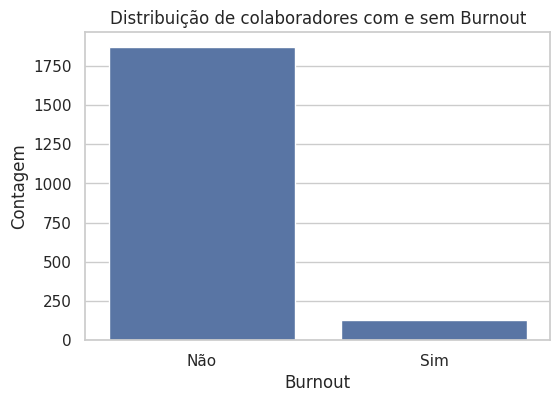

In [45]:
# Gráfico 1: Distribuição de burnout
plt.figure(figsize=(6, 4))
sns.countplot(x='Burnout', data=df)
plt.title('Distribuição de colaboradores com e sem Burnout')
plt.xlabel('Burnout')
plt.ylabel('Contagem')
plt.show()



### Análise do Gráfico de Contagem

Neste gráfico, observo que a maioria dos colaboradores do dataset não apresentam Burnout, mas há uma quantidade significativa que sim. Isso mostra que o Burnout não é um fator raro entre os funcionários analisados, o que justifica a importância de prever esse risco com base em dados históricos.


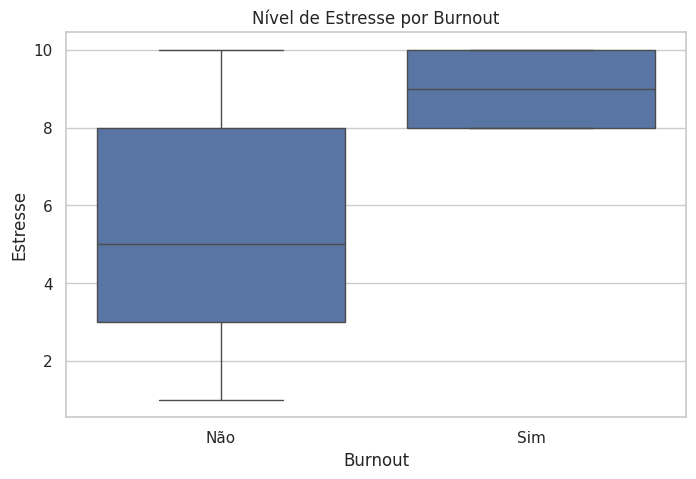

In [46]:
# Gráfico 2: Estresse por burnout
plt.figure(figsize=(8, 5))
sns.boxplot(x='Burnout', y='Estresse', data=df)
plt.title('Nível de Estresse por Burnout')
plt.xlabel('Burnout')
plt.ylabel('Estresse')
plt.show()


### Análise do Boxplot de Estresse

Percebo que os colaboradores com Burnout possuem níveis medianos de estresse que são mais altos que os que não apresentam essa condição. A presença de valores extremos (outliers) indica que há casos com estresse bastante elevado. Isso reforça a hipótese de que o estresse é um dos principais fatores associados ao burnout.


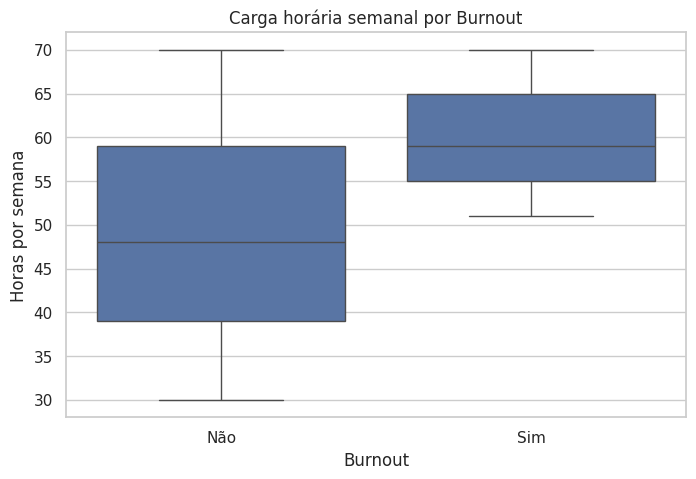

In [47]:
# Gráfico 3: Horas por semana por burnout
plt.figure(figsize=(8, 5))
sns.boxplot(x='Burnout', y='Horas por semana', data=df)
plt.title('Carga horária semanal por Burnout')
plt.xlabel('Burnout')
plt.ylabel('Horas por semana')
plt.show()


### Análise do Boxplot de Carga Horária

Este gráfico mostra que os colaboradores com Burnout também costumam trabalhar mais horas por semana. Isso indica uma possível sobrecarga de trabalho como fator de risco. A distribuição é mais generalizada entre os que possuem Burnout, o que pode indicar variações entre as áreas de atuação ou funções.


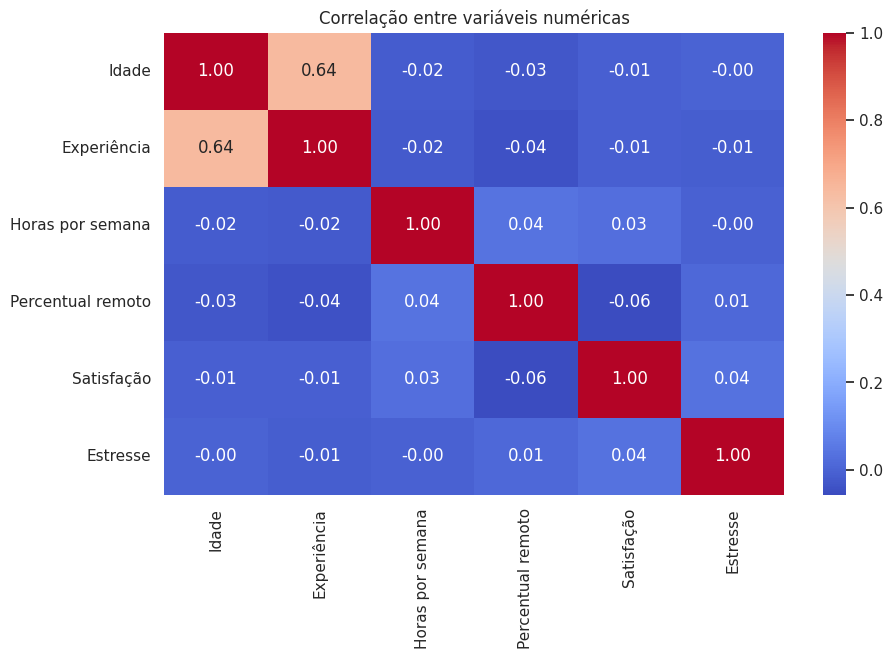

In [48]:
# Gráfico 4: Correlação entre variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.show()

### Análise da Matriz de Correlação

A matriz de correlação mostra que quanto maior o estresse e a carga horária semanal, maior também a chance de o colaborador apresentar Burnout. Por outro lado, níveis mais altos de satisfação parecem estar ligados a uma menor probabilidade de Burnout, sugerindo que a satisfação pode funcionar como um fator de proteção. Esses achados reforçam a importância dessas variáveis na construção do modelo preditivo.


## Modelagem Preditiva

Após a análise exploratória, decidi testar a criação de um modelo preditivo com o objetivo de identificar, com base nos dados disponíveis, quais colaboradores estariam mais propensos a apresentar burnout.

Utilizei a Regressão Logística por ser um algoritmo leve, interpretável e adequado para problemas de classificação binária como este. Antes de treinar o modelo, apliquei um pré-processamento nos dados, padronizando as variáveis numéricas com `StandardScaler`.

A seguir, apresento os passos de modelagem, desde a separação dos dados em treino e teste até o treinamento do modelo.



Matriz de confusão:
[[552   3]
 [ 24  21]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       555
           1       0.88      0.47      0.61        45

    accuracy                           0.95       600
   macro avg       0.92      0.73      0.79       600
weighted avg       0.95      0.95      0.95       600



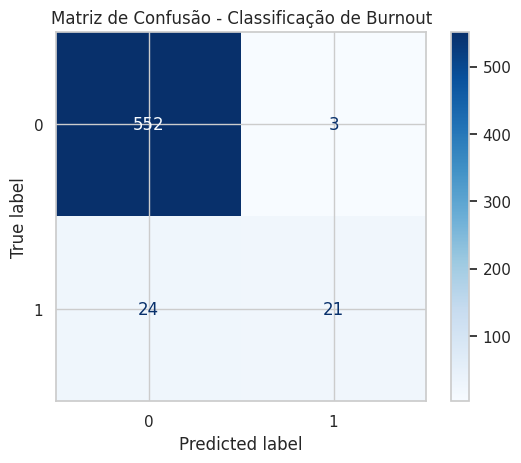

In [49]:
## Modelagem preditiva

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df[['Idade', 'Experiência', 'Horas por semana', 'Percentual remoto', 'Satisfação', 'Estresse']]
y = df['Burnout'].map({'Sim': 1, 'Não': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)
print("\nMatriz de confusão:")
print(confusion_matrix(y_test, pred))

print("\nRelatório de classificação:")
print(classification_report(y_test, pred))

ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
plt.title("Matriz de Confusão - Classificação de Burnout")
plt.show()


Abaixo, visualizamos como a variável "Estresse" se comporta antes e depois da padronização. A transformação é importante para que o modelo não seja influenciado pela escala dos dados.


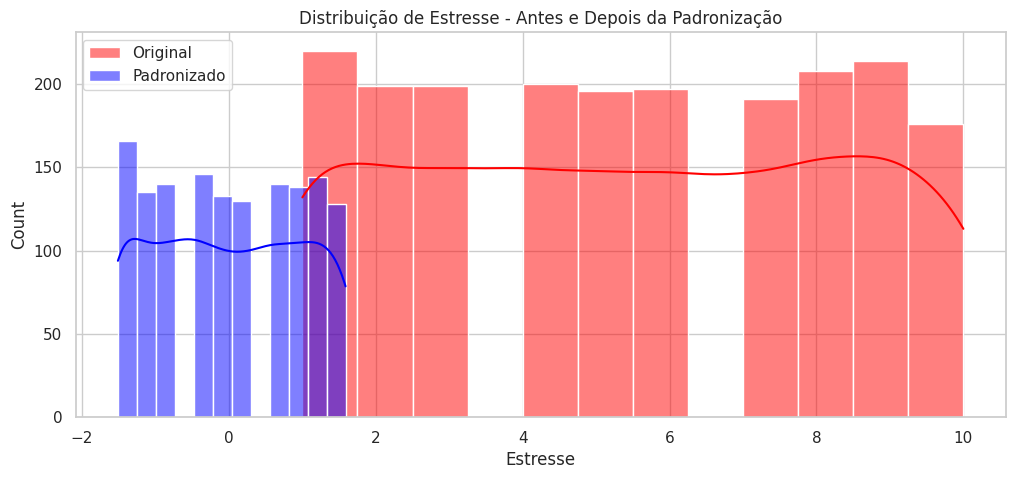

In [50]:
plt.figure(figsize=(12,5))
sns.histplot(X['Estresse'], kde=True, color='red', label='Original')
sns.histplot(X_train_scaled[:, 5], kde=True, color='blue', label='Padronizado')
plt.title('Distribuição de Estresse - Antes e Depois da Padronização')
plt.legend()
plt.show()


## Avaliação do Modelo

O modelo conseguiu fazer previsões razoáveis. Ele acertou bem os casos em que o colaborador **não** está em Burnout, mas teve mais dificuldade em identificar corretamente quem **está**. Isso é algo esperado, principalmente quando o número de casos positivos é menor, como acontece aqui.

Mesmo assim, achei que os resultados foram bons para um primeiro teste, e mostraram que dá sim para usar os dados como base para pensar em ações preventivas dentro das empresas.

Se fosse um projeto real, eu seguiria testando outros modelos mais avançados e também buscaria apoio de profissionais de RH para validar essas informações com mais profundidade.



## Reflexão Final – Checklist

1. **Qual problema eu quis resolver com este projeto?**  
   A ideia foi entender melhor o que pode levar um colaborador a desenvolver Burnout e tentar prever esse risco com base em dados de comportamento e rotina de trabalho.

2. **O que eu queria descobrir ou prever?**  
   Quis investigar como fatores como carga horária, estresse e satisfação influenciam o Burnout, e construir um modelo que ajudasse a identificar possíveis casos com base nesses dados.

3. **Minha variável-alvo era de que tipo?**  
   Trabalhei com uma variável categórica binária, que indica se o colaborador apresenta ou não sinais de Burnout.

4. **Tive que limpar ou transformar dados? Por quê?**  
   Sim. Traduzi os nomes das colunas e valores para o português, tratei variáveis categóricas com codificação e apliquei escalonamento nos dados numéricos. Tudo isso foi necessário para preparar os dados para o modelo e facilitar a leitura dos resultados.

5. **Quais variáveis mostraram mais relação com o burnout?**  
   Estresse e horas de trabalho por semana foram as que mais se destacaram. A satisfação apareceu como um possível fator de proteção, o que fez bastante sentido com o que se observa na prática.

6. **Quais visualizações me ajudaram mais na análise?**  
   Os boxplots foram essenciais para ver as diferenças entre quem tem e quem não tem Burnout. A matriz de correlação também foi importante para confirmar os relacionamentos entre as variáveis.

7. **Se fosse um projeto real em uma empresa, o que eu precisaria pensar?**  
   Seria fundamental garantir que os dados fossem confiáveis e coletados com cuidado. Também precisaria considerar aspectos éticos e de privacidade, além de envolver pessoas da área de RH ou psicologia organizacional para validar as análises e ajudar na interpretação dos resultados.


## Conclusão


A análise e o pré-processamento do dataset de colaboradores permitiram observar com clareza a relação entre algumas variáveis e a presença de Burnout. Foi possível perceber que fatores como estresse elevado, maior carga horária semanal e menor nível de satisfação estão mais associados ao risco de Burnout, o que reforça a importância de olhar para esses dados com atenção dentro das empresas.

A análise exploratória me ajudou a visualizar esses padrões por meio de boxplots e da matriz de correlação, e foi essencial para entender o comportamento dos dados antes de partir para qualquer modelo. Já o pré-processamento — com a padronização das variáveis e separação entre treino e teste — preparou bem o terreno para aplicar o modelo de regressão logística.

Mesmo sendo um modelo simples, ele conseguiu trazer resultados interessantes e pode ser usado como um primeiro passo para monitorar sinais de esgotamento. Em um cenário real, eu seguiria testando outras abordagens mais desenvolvidas e buscaria o apoio de especialistas em RH para validar as interpretações.

As três hipóteses que levantei foram confirmadas:

- **Colaboradores com maior carga horária tendem a apresentar burnout?** Sim, o boxplot mostrou uma diferença clara na média de horas semanais para quem está em burnout.

- **Existe relação entre estresse elevado e burnout?** Sim, a mediana do estresse foi bem maior entre quem apresentou burnout.

- **A satisfação no trabalho ajuda a proteger contra o burnout?** Sim, os dados mostraram que colaboradores com maior satisfação tendem a não apresentar burnout.

No geral, esse projeto me ajudou a praticar todo o processo de análise de dados de forma completa, desde a formulação do problema até o desenvolvimento de um modelo preditivo, tudo isso com base em boas práticas e decisões conscientes.


In [51]:
df.to_csv('dados_burnout.csv', index=False)


In [52]:
from google.colab import files
files.download('dados_burnout.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>